<a href="https://colab.research.google.com/github/YeojinKim03/AI-study/blob/master/220802_AI_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모듈 임포팅



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

#Keras DNN 최소코드

##데이터 준비

1차원 데이터 x와 x**2의 1차원 데이터 y

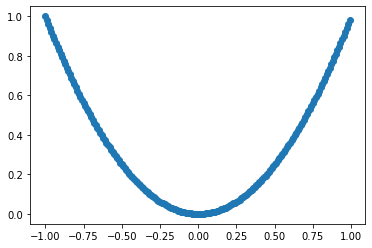

In [ ]:
import numpy as np

x=np.arange(-1,1,0.01) #-1부터 1까지 0.01간격으로
y=x**2

plt.scatter(x,y)

In [ ]:
print(len(x))
print(x.shape) #x의 모양, 200개

200
(200,)


##최소 코드

아래의 코드는 최소 코드

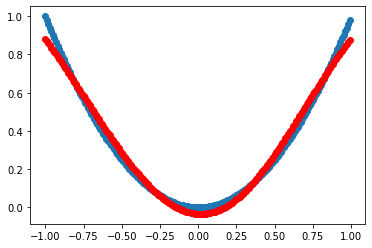

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input #Dense는 전체연결, Input도 임포드해야

import time

#모델 정의
model=keras.Sequential() #빈껍데기 모델 생성, 모델 네트워크를 만드는 클래스, 일종의 박스
model.add(Input(1)) #input은 클래스, 1개의 노드로 이루어진 1개의 레이어 추가함
model.add(Dense(10, activation='tanh')) #노드 10개인 레이어
model.add(Dense(10, activation='tanh')) #노드 10개인 레이어
model.add(Dense(1)) #마지막은 1개의 노드

#컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse") #loss function은 mse로 사용, 그걸 최소화 하게 할 optimizer는 SGD로 사용

#학습
model.fit(x,y, epochs=1000, verbose=0, batch_size=32) #x array가 입력, y 가 출력으로 학습해라

#예측
y_=model.predict(x) #학습이 끝나면 예측

#결과 그래프로 보기
plt.scatter(x,y) #정답 그래프
plt.scatter(x,y_,color='r') #결과, 예측한 값
plt.show()


# Keras DNN 최소 코드에 기본 정도만 추가

최소는 아니고, 이 정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

7/7 [==============================] - 0s 2ms/step - loss: 0.0013 - mae: 0.0291
loss= 0.001259312964975834
mae= 0.02906210348010063


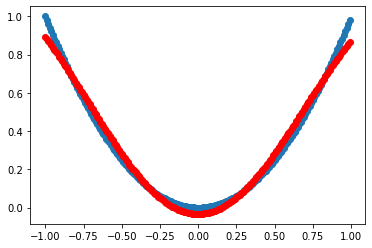

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

model=keras.Sequential() #빈 모델
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"]) #metrics : 모델이 얼마나 잘하는지 성능을 수치로 나타낸 것, mae (mean absolute(절댓값) error)

model.fit(x,y, epochs=1000, verbose=0, batch_size=32)

loss, mae= model.evaluate(x,y) #추가된 것
print("loss=", loss) #추가된 것
print("mae=", mae)

y_=model.predict(x)

plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

## 테스트셋으로 평가하기

데이터를 train과 test로 나누어 준비한다

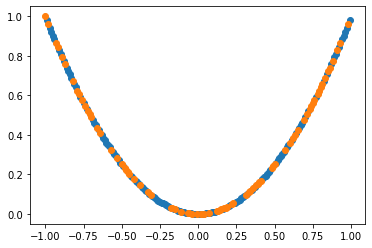

In [ ]:
x=np.arange(-1,1,0.01)
np.random.shuffle(x) #x라는 array를 셔플해줌
y=x**2

split_index= int(x.shape[0]*0.6) #개수의 60퍼센트를 train으로 넣어줄 것

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y= y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()

3/3 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0432
loss= 0.0026806581299751997
mae= 0.043169230222702026


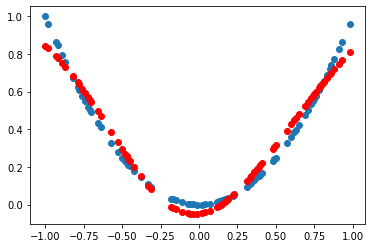

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

# 이전 : model.fit(x, y, epochs=1000, verbose=0, batch_size=32)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)

# loss, mae = model.evaluate(x, y)
loss, mae=model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

# 이전 : y_ = model.predict(x)
y_ = model.predict(test_x)

# 이전 : plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고, evaluate()와 predict()에는 test_x, test_y를 사용하였다.
그려진 글미을 보면 test_x의 점 사이에 빈 간격이 보임--> 그 간격이 train_x

##학습 시간을 출력


elapsed : 10.59839391708374
3/3 [==============================] - 0s 5ms/step - loss: 0.0016 - mae: 0.0340
loss= 0.001637740759178996
mae= 0.0339517667889595


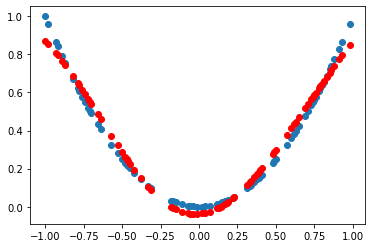

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

start_time = time.time() # ADD #1970년부터 흘러간 초를 측정
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
print("elapsed : {}".format(time.time() - start_time)) # ADD #현재 시간 - 이전 시간 : 몇 초나 지났는지 알 수 있음

    

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## model.summary() 네트워크 모양 보기

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 10)                20        
                                                                 
 hidden2 (Dense)             (None, 10)                110       
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


elapsed : 6.130526065826416


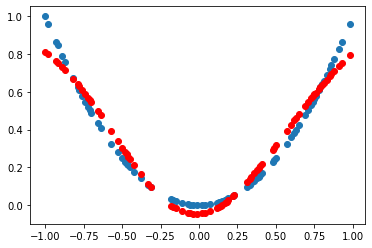

In [ ]:
model = keras.Sequential(name='my_model')
model.add(Input(1, name='input'))
model.add(Dense(10, activation='tanh', name='hidden1')) #shape는 출력되는 개수, Param#(업데이트 해야하는 weight 수)= input 1개 + 1(b), 10개 출력 --> 20개
model.add(Dense(10, activation='tanh', name='hidden2')) #shape는 출력되는 개수, Param#(업데이트 해야하는 weight 수)= input 10 + 1(b), 10개 출력--> 110개
model.add(Dense(1, name='output')) ##shape는 출력되는 개수, Param#(업데이트 해야하는 weight 수)= input 10 + 1(b), 1개 출력--> 11개


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary() # ADD, 전체적인 모델 모양 보여줌

start_time = time.time() 
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

네트워크의 모양이 보임 <br>
은닉층 2개가 있음 (노드 10개, 노드 10개) <br>
모든 레이어는 activation (w*x+b)의 형태로 <br>
첫번째 은닉층은 20개 ( = ((1+1)*10) = (입력수+1)*10)의 웨이트를, <br>
두번째 은닉층은 110개 ( = ( (10+1)*10) )의 웨이트가 있다 <br>

##모델 그리기

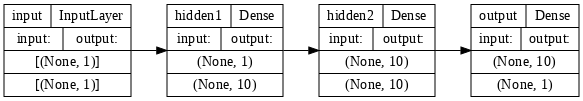

In [ ]:
tf.keras.utils.plot_model(model=model, rankdir="LR", dpi=72, show_shapes=True) #dpi (dot por inch 해상도, show_shapes : input과 output모양), rankdir : LR이면 왼쪽에서 오른쪽, TD이면 위에서아래로

##Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다

In [ ]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r') #그래프 그림
plt.savefig("base_result.png") #사진 저장해줌

from IPython.display import Image 
display(Image("base_result.png")) #이 파일을 읽어서 보여줌

#Keras DNN Template

본 실습에 사용되는 코드의 템플릿

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

#layer 수

히든레이어 없을 경우 - 학습 x
<br>
히든레이어 3개로 증가 - 차이 x
<br>
히든레이어 5개로 증가 - 살짝 성능 향상
<br>
히든레이어 10개로 증가 - 성능 좋아짐

#node 수
node 5개 - 살짝 차이남
node 2개 - 차이가 큼
node 1개 - 거의 학습 x

#Sin 데이터

데이터에 변화

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

In [ ]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

##학습 추가 진행

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

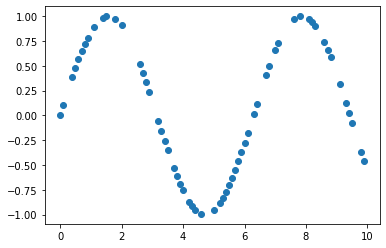

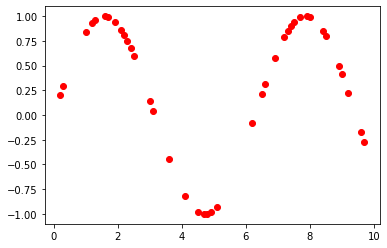

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.811999559402466
2/2 [==============================] - 0s 8ms/step - loss: 0.1687 - mae: 0.3242
loss= 0.16866420209407806
mae= 0.3242031931877136


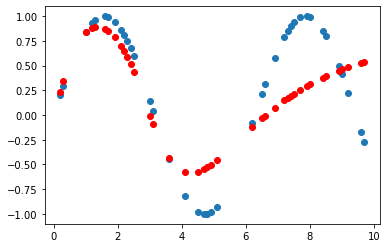

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

##추가 학습

In [ ]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=32):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)

0 times fitting
elapsed : 3.3204357624053955


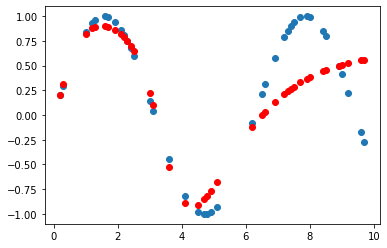

1 times fitting
elapsed : 3.2396862506866455


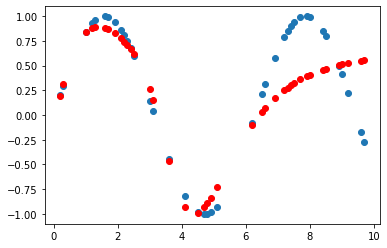

2 times fitting
elapsed : 5.477342128753662


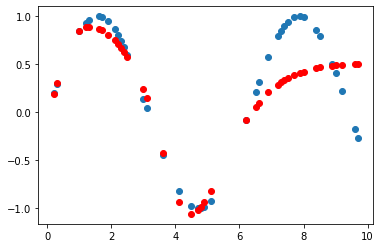

3 times fitting
elapsed : 3.193744421005249


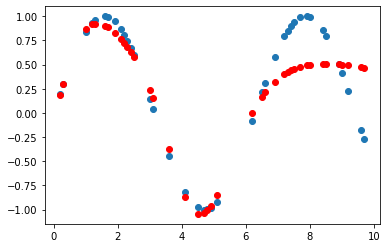

4 times fitting
elapsed : 3.236529588699341


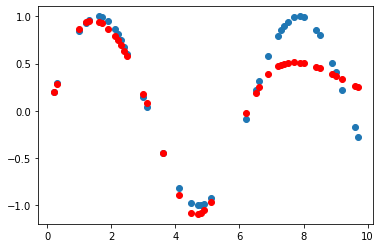

5 times fitting
elapsed : 3.241152048110962


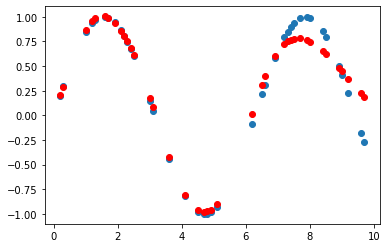

6 times fitting
elapsed : 5.169502258300781


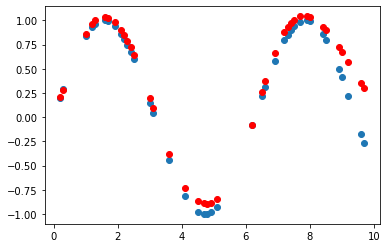

7 times fitting
elapsed : 3.401324510574341


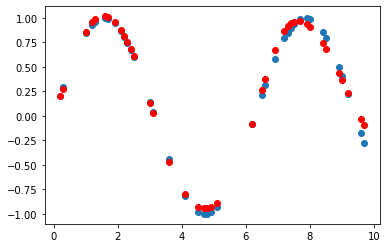

8 times fitting
elapsed : 5.159112453460693


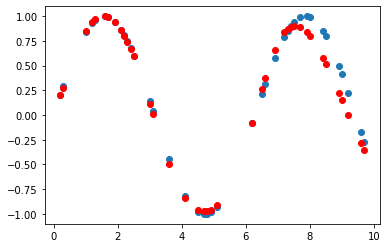

9 times fitting
elapsed : 3.251356840133667


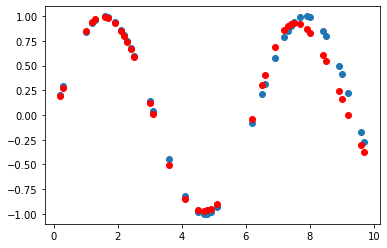

In [ ]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

# model.fit()의 batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.

batch_size가 증가할수록 시간은 단축되는데, 데이터가 뭉개지긴 함

##model.fit() verbose

*   0 : 진행하면서 아무런 출력 없이
*   1 : 진행하면서 출력과 같이
*   2 : 시그널바는 없어짐








In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

print(train_x.shape)

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=32) #1로 하면 과정 보여주기 #2로하면 프로그래램 시그널 바를 안보여줌
print("elapsed : {}".format(time.time() - start_time))    

# loss 보기
이런 값이 나와야 하는데, 나온값과 차이
<br>
trainig loss는 성능과는 반대, test데이터는 어느순간 loss가 감소하다 오버피팅되어 loss가 증가함
<br>
언더피팅 <-> 오버피팅

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
print("elapsed : {}".format(time.time() - start_time)) 

In [ ]:
plt.plot(history.history['loss']) #리스트로 담겨져있음
plt.show()

# 학습 시에 validation
train data 8/ validation data 1/ test data 1
<br>
train data : 학습에 사용되는 데이터
<br>
validation data : 오버피팅 안되게 (학습에 사용되지 않는 데이터)
<br>
test data : 성능 시험해보자

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

##model.fit()의 validation_data

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

#data 분할시키는 과정은 생략

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

In [ ]:
plt.plot(history.history['loss'], label='loss') #history.history는 과거 이력 보여줌 
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend() #범례 표시

##model.fit()의 validation_split

따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.
<br>
keras가 알아서 분리해 줌
<br>
validation에 사용된 데이터는 학습에 사용되지 않는다.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32, validation_split=0.1) #test데이터로 준 일부를 validation에 사용
print("elapsed : {}".format(time.time() - start_time)) 

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

#데이터 크기와 epoch 수

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001) #100배 더 많이 됨

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=32) #epoch 수 줄임
print("elapsed : {}".format(time.time() - start_time))    

In [ ]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y) #테스트 값
plt.scatter(test_x,y_,color='r') #예측값
plt.show()

train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.
<br>
epoch가 적어도 데이터 수가 많으면 학습 잘된다.
데이터 최대한 많이 확보해야 한다.

#Shuffle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

##전체 데이터 준비 시에

In [ ]:
x = np.arange(0,10,0.1)
# np.random.shuffle(x) # COMMENTED, 셔플안함
y = np.sin(x) #사인그래프

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=32)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

train 데이터와 test 데이터가 서로 떨어져 있다.
<br>
train 영역의 데이터로 학습된 모델은 test 영역의 데이터에 적용하지 못한다.
<br>
전체데이터를 잘 섞어 주고, 이를 train, test로 나누어야 한다.

##나눠준 후

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # UNCOMMENT, 셔플 함
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=32)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

##데이터 쌍 유지하면서 섞기

In [ ]:
x = np.arange(0,10,0.1) #0부터 10이전까지 0.1단위로
y = x

indexes = np.arange(len(x))
print(indexes)
np.random.shuffle(indexes)
print(indexes)

print(x[:10])
print(y[:10])

x = x[indexes]
y = y[indexes]

print(x[:10])
print(y[:10])

##학습 진행 시에
학습시에 데이터를 섞어주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수 있다.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=32)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

각 epoch마다 섞어 주는 것이 중요하다.
<br>
shuffle 파라미터의 디펄트 값은 True로, Keras의 model.fit() 호출시에는 따로 설정하지 않아도 된다

#모델 저장과 로딩

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=32)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

##모델 저장

In [ ]:
model.save('my_model.h5')

!ls -al

##모델 로딩

In [ ]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()